### Importing Libraries

In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Understanding Dataset

In [ ]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [615]:
### Check null values

df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [616]:
df[df.isnull().any(axis=1)] #axis=0  ↓   (rows)  | axis=1  →   (columns)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [617]:
### added extra column region which will contain 0 till 122 index as there is seprate datset 'Sidi-Bel Abbes Region Dataset	' and after 122 index all are 1

# so 0->bejai region
# and 1->sidi bel region

df.loc[:122,'region']=0
df.loc[122:,'region']=1

In [618]:
### drop null values

df.dropna(inplace=True)

In [619]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [620]:
# datatype of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.5+ KB


In [621]:
# conerting region data type from object to float
df['region']=df['region'].astype(int)

In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [623]:
# unique values of each column

for col in df.columns:
  print(f"{col} : {df[col].unique()}")
  print("-"*20)
  print()

day : ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' 'day']
--------------------

month : ['06' '07' '08' '09' 'month']
--------------------

year : ['2012' 'year']
--------------------

Temperature : ['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' 'Temperature' '38' '39' '40' '42']
--------------------

 RH : ['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' ' RH' '44' '41'
 '42' '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35'
 '39' '31' '21' '40' '24' '38' '26']
--------------------

 Ws : ['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' ' Ws'
 '10' '9' '8' '6' '29']
--------------------

Rain  : ['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'


In [624]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [625]:
 ### drop row at 122 index

df.drop(index=123,inplace=True)

In [626]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [627]:
# Clean column names by stripping extra whitespace

df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [628]:
# Convert column data types to appropriate numeric formats
# Integers  : day, month, year, Temperature, RH, Ws
# Floats    : Rain, FFMC, DMC, DC, ISI, BUI, FWI


df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [630]:
# statistical summary
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [631]:
# store cleaned dataset into "cleaned_algerian_forest_fires.csv"

df.to_csv('cleaned_algerian_forest_fires.csv',index=False)

 ### Exploratory Data analysis

In [632]:
# Create a copy of the original dataframe to avoid modifying it directly

df_copy=df.copy()

In [633]:
# columns of data frame

df_copy.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [634]:
# Calculate correlation of FWI with other numerical features

df_copy[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI','region']].corr()['FWI']

,FWI
day,0.350781
month,0.082639
year,NaN
Temperature,0.566670
RH,-0.580957
Ws,0.032368
Rain,-0.324422
FFMC,0.691132
DMC,0.875864
DC,0.739521


In [635]:
#create extra column as month name

df_copy['month_name']=df_copy['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,month_name
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,Jun
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,Jun
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,Jun
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,Jun
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,Sep
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,Sep
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,Sep
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,Sep


In [636]:
# unique month names
df_copy['month_name'].unique()

array(['Jun', 'Jul', 'Aug', 'Sep'], dtype=object)

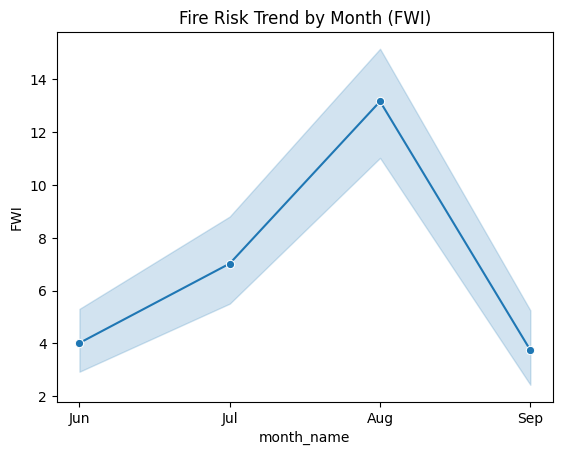

In [637]:
# Visualize monthly trend of Fire Weather Index (FWI)

sns.lineplot(y='FWI',x='month_name',data=df_copy,marker='o')
plt.title('Fire Risk Trend by Month (FWI)')
plt.show()

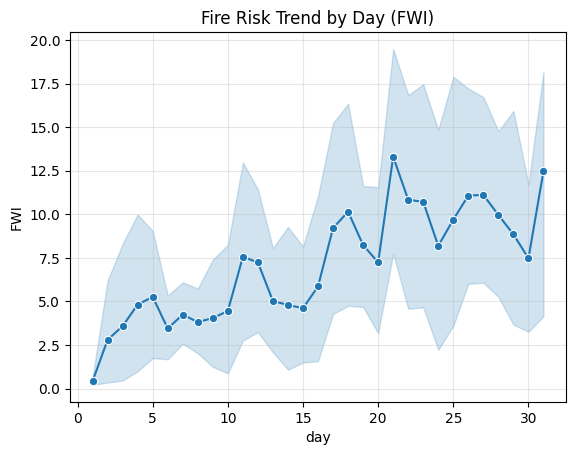

In [638]:
# Visualize daily trend of Fire Weather Index (FWI)

sns.lineplot(x='day',y='FWI',data=df_copy,marker='o')
plt.title('Fire Risk Trend by Day (FWI)')

plt.grid(True,alpha=0.3)
plt.show()

In [639]:
# Remove leading and trailing spaces from the 'Classes' column values

df_copy['Classes'] = df_copy['Classes'].str.strip()


In [640]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [641]:
# Split dataset into separate dataframes based on region

bejai_region=df_copy[df_copy['region']==0]
sidi_bel_region=df_copy[df_copy['region']==1]
bejai_region

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,month_name
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,Jun
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,Jun
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,Jun
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,Jun
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0,Sep
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0,Sep
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0,Sep
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0,Sep


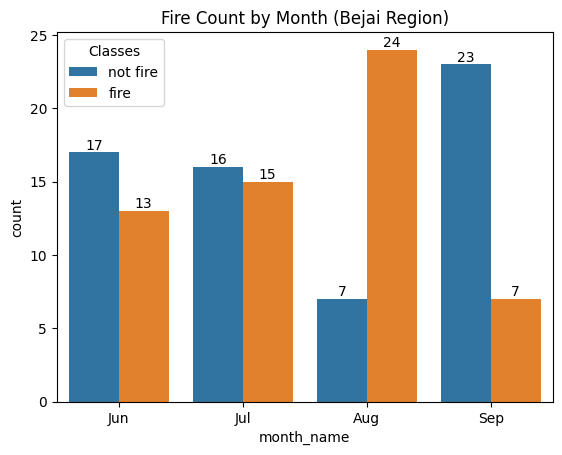

In [642]:
# Plot monthly fire occurrence counts for Bejaia region by fire class

ax=sns.countplot(x='month_name',data=bejai_region,hue='Classes')

for bar in ax.containers:
  ax.bar_label(bar)

plt.title('Fire Count by Month (Bejai Region)')
plt.show()

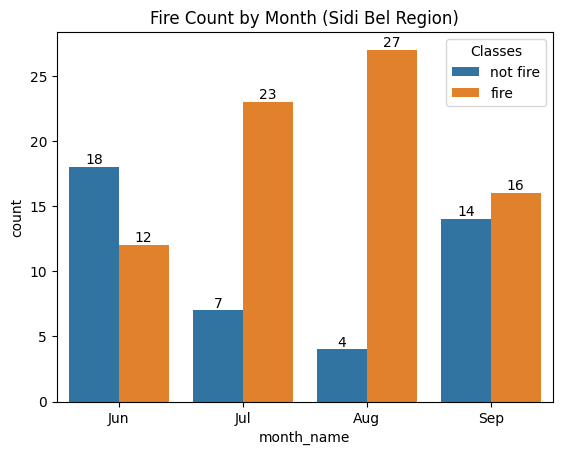

In [643]:
# Plot monthly fire occurrence counts for Sidi Bel region by fire class

ax=sns.countplot(x='month_name',data=sidi_bel_region,hue='Classes')

for bar in ax.containers:
  ax.bar_label(bar)

plt.title('Fire Count by Month (Sidi Bel Region)')
plt.show()

In [644]:
# Encode 'Classes' column: not fire → 0, fire → 1

df_copy['Classes']=df_copy['Classes'].map({"not fire":0,"fire":1})

In [645]:
df_copy['Classes'].unique()

array([0, 1])

In [646]:
# Check the distribution of fire vs non-fire classes

df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [647]:
# Drop date-related columns that are not required for modeling

df_copy.drop(['day','month','year','month_name'],axis=1,inplace=True)

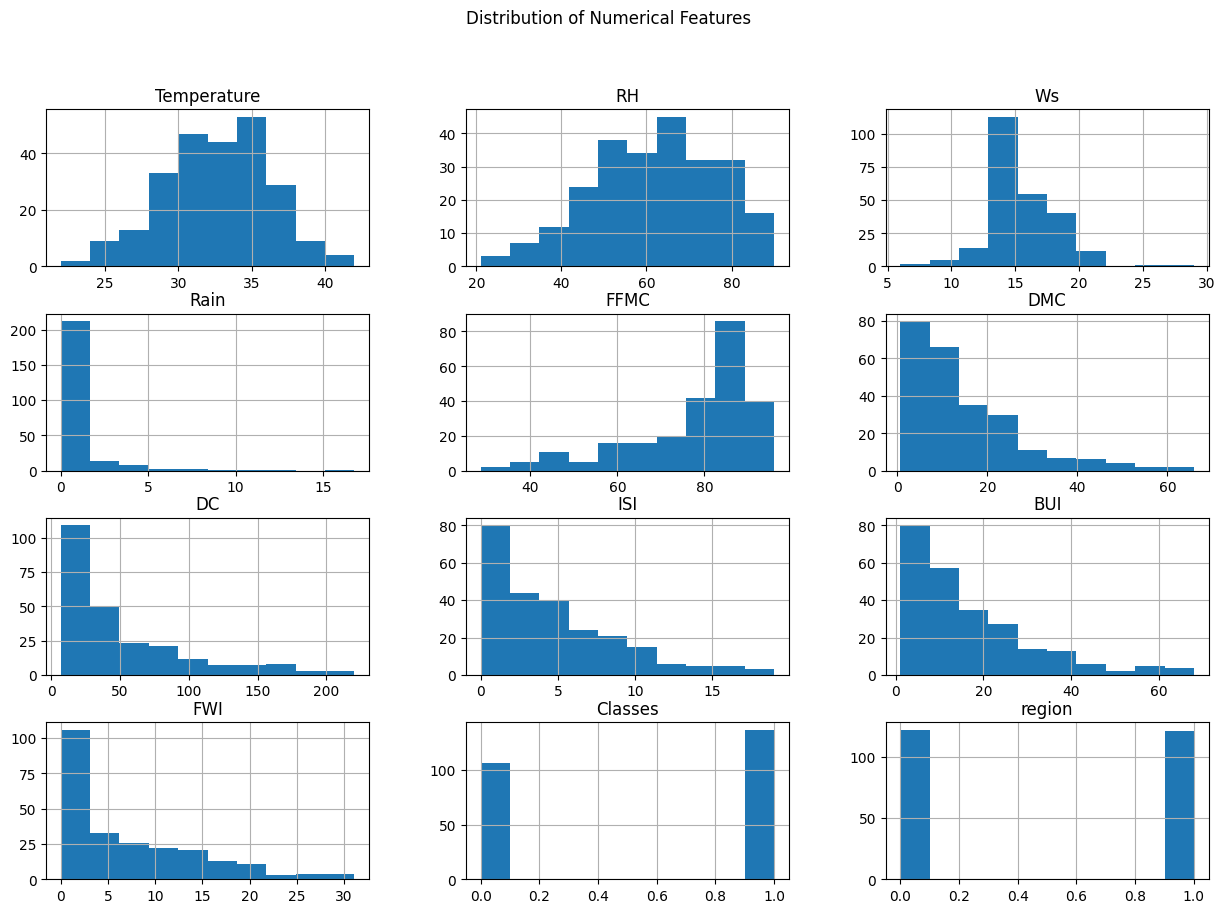

In [648]:
# Plot histograms of all numerical features to visualize their distributions

df_copy.hist(figsize=(15,10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [649]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [650]:
# Calculate the percentage distribution of fire vs non-fire classes

perc_of_classes=(df_copy['Classes'].value_counts(normalize=True)*100).reset_index()
perc_of_classes['class_name']=perc_of_classes['Classes'].map({1:'fire',0:'not fire'})
perc_of_classes

,Classes,proportion,class_name
0,1,56.378601,fire
1,0,43.621399,not fire


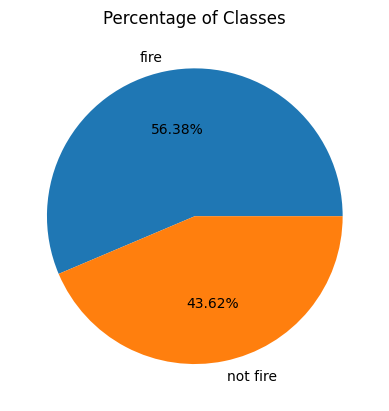

In [651]:
# Plot a pie chart to visualize the percentage distribution of fire vs non-fire classes

plt.pie(perc_of_classes['proportion'],labels=perc_of_classes['class_name'],autopct='%1.2f%%')
plt.title('Percentage of Classes')
plt.show()

In [652]:
# Compute the correlation matrix of all numerical features

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


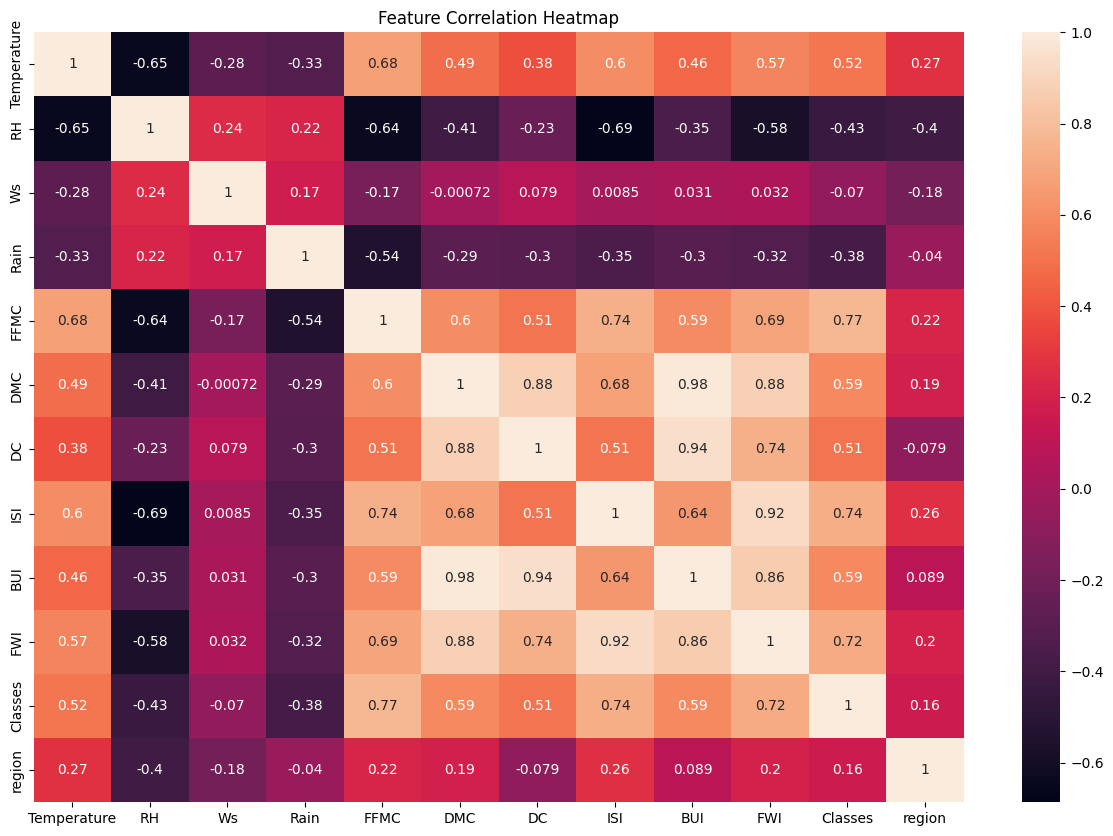

In [653]:
# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

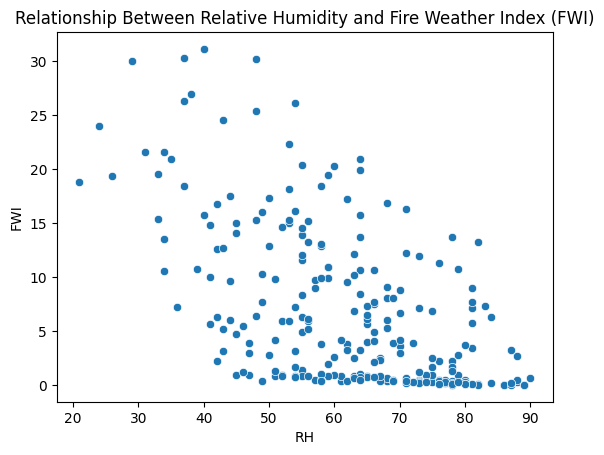

In [654]:
# Scatter plot of Relative Humidity (RH) vs Fire Weather Index (FWI)

sns.scatterplot(x='RH',y='FWI',data=df_copy) # as fwi (fire risk) decreses relative humidity increses More humidity → less fire danger :- negative relationship
plt.title('Relationship Between Relative Humidity and Fire Weather Index (FWI)')

plt.show()
# Observed negative relationship: higher humidity → lower fire risk

In [655]:
df_copy.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
